# Connect GDrive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
file_dir = ('/content/drive/MyDrive/Portofolio/Project Performance expedition')
os.chdir(file_dir)

In [ ]:
!ls

 Datamart_expedition.csv   datamart.sql  'EDA Expedition_performance.ipynb'


# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
headers = ['id', 'expedition', 'mode_shipment', 'product_price (IDR)', 'customer_calls', 'customer_rating', 'prior_purchases', 'product_importance', 'weight (Grams)', 'delay_ontime', 'gender', 'discount', 'province' ]
df = pd.read_csv('Datamart_expedition.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,Ninja Express,Flight,2542428,4,2,3,low,1233,1,F,632016,Bengkulu
1,10,TIKI,Flight,2355696,3,2,3,medium,1187,1,F,416556,Jambi
2,100,TIKI,Ship,2082780,4,2,2,medium,1617,1,M,301644,Kepulauan Riau
3,1000,TIKI,Ship,3892644,3,3,2,medium,3542,1,M,215460,DKI Jakarta
4,10000,TIKI,Flight,2269512,3,3,3,low,5502,0,M,14364,Bangka Belitung


# Add Columns Name

In [ ]:
df.columns=headers

In [ ]:
df.head()

,id,expedition,mode_shipment,product_price (IDR),customer_calls,customer_rating,prior_purchases,product_importance,weight (Grams),delay_ontime,gender,discount,province
0,1,Ninja Express,Flight,2542428,4,2,3,low,1233,1,F,632016,Bengkulu
1,10,TIKI,Flight,2355696,3,2,3,medium,1187,1,F,416556,Jambi
2,100,TIKI,Ship,2082780,4,2,2,medium,1617,1,M,301644,Kepulauan Riau
3,1000,TIKI,Ship,3892644,3,3,2,medium,3542,1,M,215460,DKI Jakarta
4,10000,TIKI,Flight,2269512,3,3,3,low,5502,0,M,14364,Bangka Belitung


# Dataset info and Describe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   expedition           10999 non-null  object
 2   mode_shipment        10999 non-null  object
 3   product_price (IDR)  10999 non-null  int64 
 4   customer_calls       10999 non-null  int64 
 5   customer_rating      10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   weight (Grams)       10999 non-null  int64 
 9   delay_ontime         10999 non-null  int64 
 10  gender               10999 non-null  object
 11  discount             10999 non-null  int64 
 12  province             10999 non-null  object
dtypes: int64(8), object(5)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,id,product_price (IDR),customer_calls,customer_rating,prior_purchases,weight (Grams),delay_ontime,discount
count,10999.00000,1.099900e+04,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,3.019267e+06,4.054459,2.990545,3.567597,3634.016729,0.596691,192092.870988
std,3175.28214,6.903808e+05,1.141490,1.413603,1.522860,1635.377251,0.490584,232776.190986
min,1.00000,1.378944e+06,2.000000,1.000000,2.000000,1001.000000,0.000000,14364.000000
25%,2750.50000,2.427516e+06,3.000000,2.000000,3.000000,1839.500000,0.000000,57456.000000
50%,5500.00000,3.073896e+06,4.000000,3.000000,3.000000,4149.000000,1.000000,100548.000000
75%,8249.50000,3.605364e+06,5.000000,4.000000,4.000000,5050.000000,1.000000,143640.000000
max,10999.00000,4.452840e+06,7.000000,5.000000,10.000000,7846.000000,1.000000,933660.000000


# Change Format Column

  ## Discount

In [ ]:
df['discount'] = (df['discount']/1000000).round(2)
df.head()

,id,expedition,mode_shipment,product_price (IDR),customer_calls,customer_rating,prior_purchases,product_importance,weight (Grams),delay_ontime,gender,discount,province
0,1,Ninja Express,Flight,2542428,4,2,3,low,1233,1,F,0.63,Bengkulu
1,10,TIKI,Flight,2355696,3,2,3,medium,1187,1,F,0.42,Jambi
2,100,TIKI,Ship,2082780,4,2,2,medium,1617,1,M,0.30,Kepulauan Riau
3,1000,TIKI,Ship,3892644,3,3,2,medium,3542,1,M,0.22,DKI Jakarta
4,10000,TIKI,Flight,2269512,3,3,3,low,5502,0,M,0.01,Bangka Belitung


 ## Product Price

In [ ]:
#df['product_price (IDR)'] = df['product_price (IDR)'].apply(lambda x: '{:,.0f}'.format(x))
df.head()

,id,expedition,mode_shipment,product_price (IDR),customer_calls,customer_rating,prior_purchases,product_importance,weight (Grams),delay_ontime,gender,discount,province
0,1,Ninja Express,Flight,2542428,4,2,3,low,1233,1,F,0.63,Bengkulu
1,10,TIKI,Flight,2355696,3,2,3,medium,1187,1,F,0.42,Jambi
2,100,TIKI,Ship,2082780,4,2,2,medium,1617,1,M,0.30,Kepulauan Riau
3,1000,TIKI,Ship,3892644,3,3,2,medium,3542,1,M,0.22,DKI Jakarta
4,10000,TIKI,Flight,2269512,3,3,3,low,5502,0,M,0.01,Bangka Belitung


# Check Miss and Duplicate Values

 ## Missing Values

In [ ]:
df.isna().sum()

id                     0
expedition             0
mode_shipment          0
product_price (IDR)    0
customer_calls         0
customer_rating        0
prior_purchases        0
product_importance     0
weight (Grams)         0
delay_ontime           0
gender                 0
discount               0
province               0
dtype: int64

In [ ]:
df['expedition'].value_counts()

JNE              3666
Ninja Express    1834
TIKI             1833
J&T              1833
SiCepat          1833
Name: expedition, dtype: int64

In [ ]:
df['mode_shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: mode_shipment, dtype: int64

In [ ]:
df['delay_ontime'].value_counts()

1    6563
0    4436
Name: delay_ontime, dtype: int64

In [ ]:
df['gender'].value_counts()

F    5545
M    5454
Name: gender, dtype: int64

In [ ]:
df['product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: product_importance, dtype: int64

In [ ]:
df['customer_rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: customer_rating, dtype: int64

 ## Duplicated Values

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10994    False
10995    False
10996    False
10997    False
10998    False
Length: 10999, dtype: bool

In [ ]:
data_duplicated = (df.duplicated()).value_counts()
data_duplicated

False    10999
dtype: int64

Tidak ada data yang Missing dan duplicated

# Save Dataset cleaned

In [ ]:
df.to_csv("data_expedition_cleaned.csv", index=False)

# Analisa Univariat and Multivariat

In [ ]:
df.head()

,id,expedition,mode_shipment,product_price (IDR),customer_calls,customer_rating,prior_purchases,product_importance,weight (Grams),delay_ontime,gender,discount,province
0,1,Ninja Express,Flight,2542428,4,2,3,low,1233,1,F,0.63,Bengkulu
1,10,TIKI,Flight,2355696,3,2,3,medium,1187,1,F,0.42,Jambi
2,100,TIKI,Ship,2082780,4,2,2,medium,1617,1,M,0.30,Kepulauan Riau
3,1000,TIKI,Ship,3892644,3,3,2,medium,3542,1,M,0.22,DKI Jakarta
4,10000,TIKI,Flight,2269512,3,3,3,low,5502,0,M,0.01,Bangka Belitung


## HeatMap

<ipython-input-22-44e514de07c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


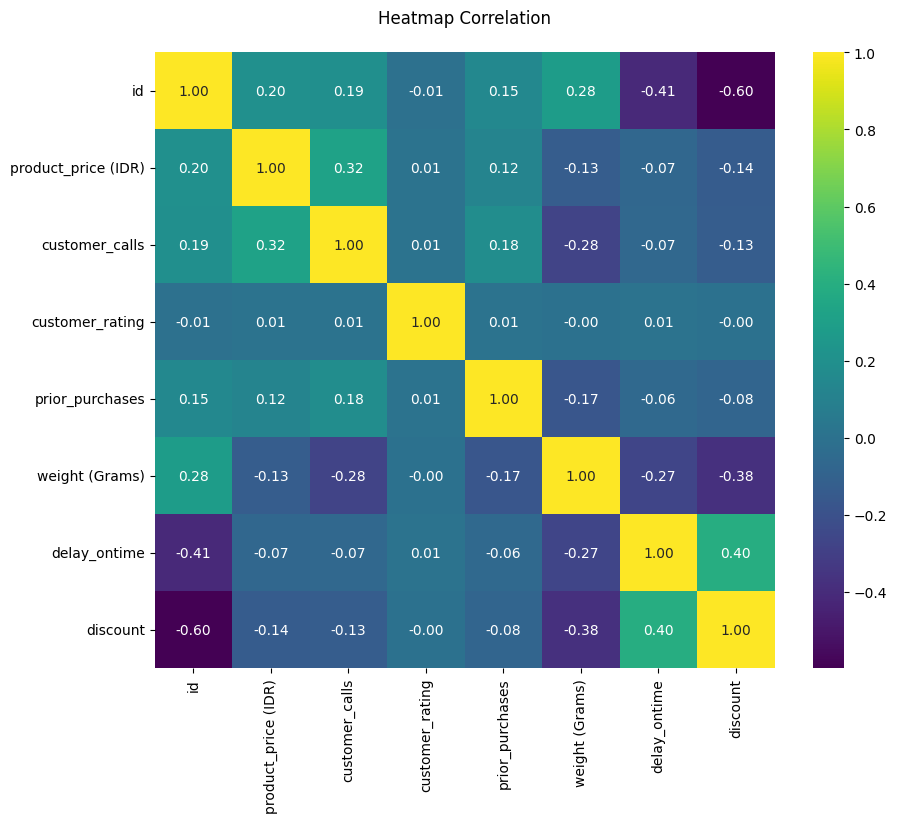

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Mengatur ukuran plot
plt.figure(figsize=(10, 8))

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

# Menambahkan judul
plt.title("Heatmap Correlation\n")

# Menampilkan plot
plt.show()

Insight :
 - Nilai diskon yg tinggi memiliki pengaruh pengiriman barang yg cenderung delay
 - Diskon diberikan cenderung kepada barang2 yang memiliki berat lebih ringan
 - Pengiriman delay cenderung terjadi pada barang yang memiliki berat yang ringan
 - Semakin sering customer melakukan calls kepada cs untuk barang yang beratnya cenderung ringan karena pengiriman cenderung delay
 - Banyak Calls dari customer dipengaruhi juga dengan harga product yg mahal




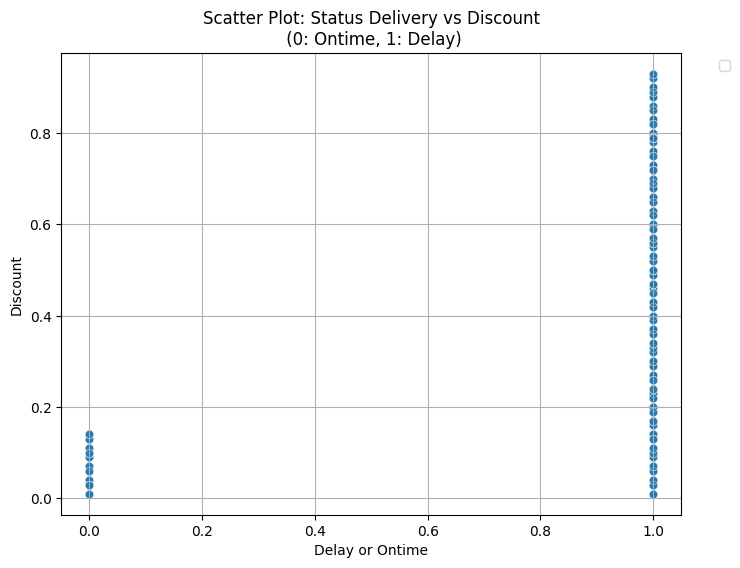

In [ ]:
#Mengatur Ukuran Plot
plt.figure(figsize=(8, 6))

#Membuat Scatter Plot
sns.scatterplot(
    data=df,
    x='delay_ontime',
    y='discount',
    alpha=0.5
    )

plt.title('Scatter Plot: Status Delivery vs Discount\n (0: Ontime, 1: Delay)')
plt.xlabel('Delay or Ontime')
plt.ylabel('Discount')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


#Show Figure
plt.show()

Insight :


1. Pengiriman tepat waktu cenderung terjadi pada barang yang memiliki diskon kurang dari 20%. Pengiriman terlambat cenderung banyak terjadi dan terjadi pada barang yg memiliki discount tinggi


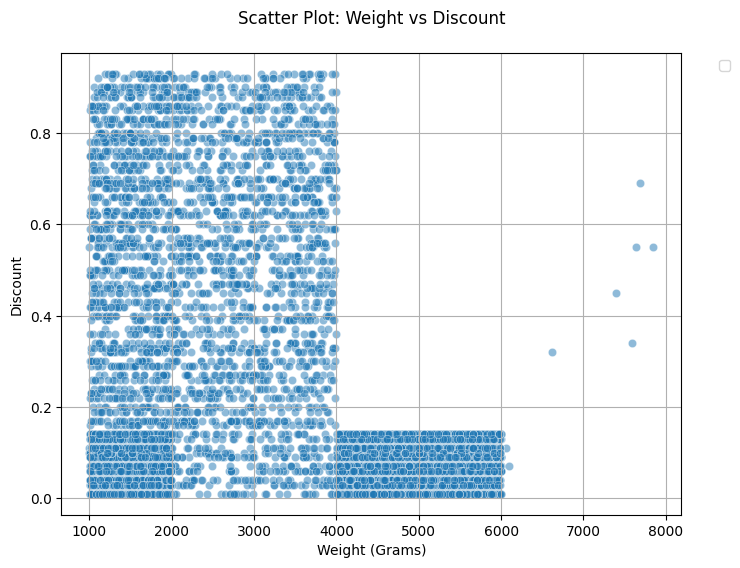

In [ ]:
#Mengatur Ukuran Plot
plt.figure(figsize=(8, 6))

#Membuat Scatter Plot
sns.scatterplot(
    data=df,
    x='weight (Grams)',
    y='discount',
    alpha=0.5
    )

plt.title('Scatter Plot: Weight vs Discount\n ')
plt.xlabel('Weight (Grams)')
plt.ylabel('Discount')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


#Show Figure
plt.show()

Insight :


1.   Pemberian diskon yg tinggi cenderung hanya diberikan kepada product yg beratnya dibawah 4 kg. Untuk product yg beratnya lebih dari 4 kg rata-rata diskon yg diberikan antara 0-19%


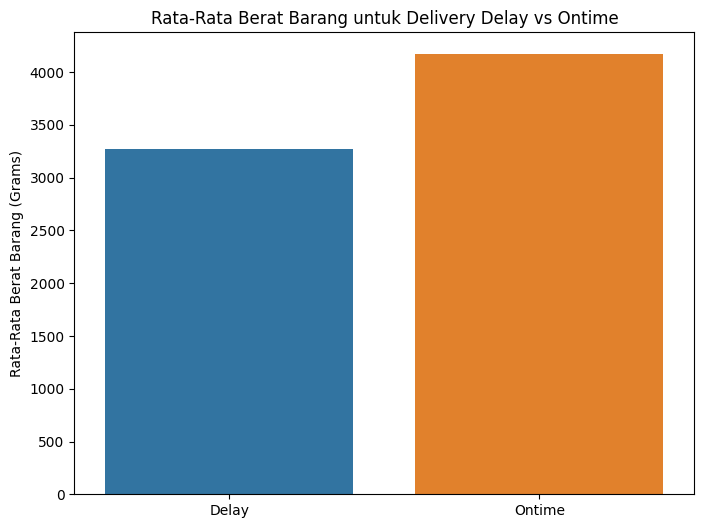

In [ ]:
# Hitung rata-rata berat barang untuk data yang mengalami keterlambatan (delay)
rata_rata_delay = df[df['delay_ontime'] == 1]['weight (Grams)'].mean()

# Hitung rata-rata berat barang untuk data yang tepat waktu (ontime)
rata_rata_ontime = df[df['delay_ontime'] == 0]['weight (Grams)'].mean()

# Buat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Delay', 'Ontime'], y=[rata_rata_delay, rata_rata_ontime])
plt.title('Rata-Rata Berat Barang untuk Delivery Delay vs Ontime')
plt.ylabel('Rata-Rata Berat Barang (Grams)')

#Show  figure
plt.show()

Insight :


1. Pengiriman delay cenderung untuk rata-rata berat barang dibawah 3,5 kg


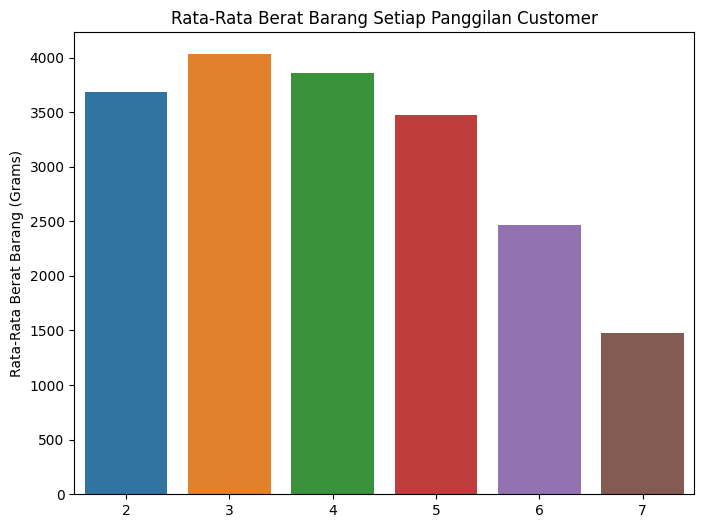

In [ ]:
# Hitung rata-rata berat barang untuk tiap panggilan
two_calls = df[df['customer_calls'] == 2]['weight (Grams)'].mean()
tri_calls = df[df['customer_calls'] == 3]['weight (Grams)'].mean()
four_calls = df[df['customer_calls'] == 4]['weight (Grams)'].mean()
five_calls = df[df['customer_calls'] == 5]['weight (Grams)'].mean()
six_calls = df[df['customer_calls'] == 6]['weight (Grams)'].mean()
seven_calls = df[df['customer_calls'] == 7]['weight (Grams)'].mean()

# Buat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x=['2', '3', '4', '5', '6', '7' ],
    y=[two_calls, tri_calls, four_calls, five_calls, six_calls, seven_calls ]
    )
plt.title('Rata-Rata Berat Barang Setiap Panggilan Customer')
plt.ylabel('Rata-Rata Berat Barang (Grams)')

#Show  figure
plt.show()

Insight :


1. Rata-rata product yang memiliki berat ringan sekita 2.5 kg kebawah akan memiliki banyak panggilan yang dilakukan oleh customer

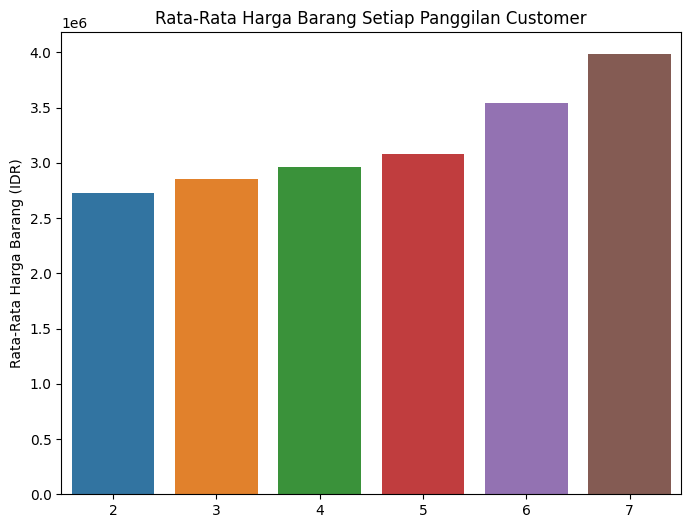

In [ ]:
# Hitung rata-rata berat barang untuk tiap panggilan
two_calls = df[df['customer_calls'] == 2]['product_price (IDR)'].mean()
tri_calls = df[df['customer_calls'] == 3]['product_price (IDR)'].mean()
four_calls = df[df['customer_calls'] == 4]['product_price (IDR)'].mean()
five_calls = df[df['customer_calls'] == 5]['product_price (IDR)'].mean()
six_calls = df[df['customer_calls'] == 6]['product_price (IDR)'].mean()
seven_calls = df[df['customer_calls'] == 7]['product_price (IDR)'].mean()

# Buat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x=['2', '3', '4', '5', '6', '7' ],
    y=[two_calls, tri_calls, four_calls, five_calls, six_calls, seven_calls ]
    )
plt.title('Rata-Rata Harga Barang Setiap Panggilan Customer')
plt.ylabel('Rata-Rata Harga Barang (IDR)')

#Show  figure
plt.show()

Insight :


1. Harga product yang mahal akan semakin banyak panggilan yang dilakukan oleh customer

## Conclusion

- Pengiriman yg terlambat cenderung terjadi pada product yg memiliki discount yg tinggi
- Discount yg besar cenderung diberikan kepada product yg beratnya dibawah 4 kg (ringan), untuk product diatas 4 kg discount yg diberikan sekita 0-19% (discount kecil)
- Berat product dibawah 3,5 kg cenderung terlambat pengirimannya
- Product yg ringan cenderung terlambat pengirimanya membuat customer sering melakukan panggilan kepada CS
- Harga product juga mempengaruhi banyak panggilan yg dilakukan oleh customer

Kesimpulan :     
  Performa expedisi kita masih kurang optimal karena masih sering terjadi pengiriman terlambat yg dipengaruhi dengan melihat dari segi aspek discount yg besar pada product. sedangkan sebagian besar product yg kita kirimkan adalah product dengan bobot yg ringan dengan memiliki harga discount yg tinggi

Recomendation :    
- Pengiriman kedepannya tidak melihat dari segi aspek discount pada product yg di order untuk meningkatkan performa expedition dan juga kepercayaan pelanggan tetap terjaga
- Jika memungkinkan merevisi kebijakan diskon pada product, Mungkin perlu mempertimbangkan diskon yang lebih moderat atau aturan pengiriman yang berbeda.